### Given a bank customer, build a neural network-based classifier that can determine
### whetherthey will leave or not in the next 6 months.
### Dataset Description: The case study is from an open-source dataset from
### Kaggle.The dataset contains 10,000 sample points with 14 distinct features 
### such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance,

### Rushikesh Chavan | 41214

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import io

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# remove unwanted variables
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).copy()
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# ## Scale the data Before performing Bivariate analysis, 
# ## Lets bring all the features to the same range
# scaler=StandardScaler()
# ## Extract only the Numerical Columns to perform Bivariate Analysis
# subset=df.drop(['Geography','Gender','HasCrCard','IsActiveMember'],axis=1)
# scaled=scaler.fit_transform(subset)
# scaled_df=pd.DataFrame(scaled,columns=subset.columns)
# sns.pairplot(scaled_df,diag_kind='kde')

In [10]:
# sns.heatmap(scaled_df.corr(),annot=True,cmap='rainbow')

In [11]:
# From the above plots, We can see that there is no significant Linear relationship between the features

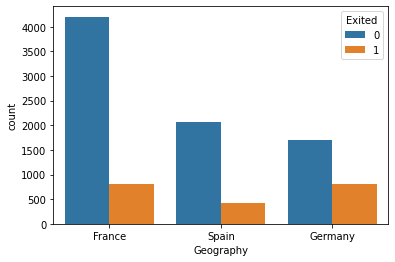

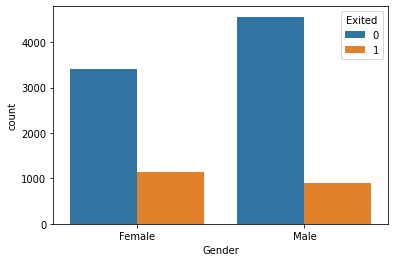

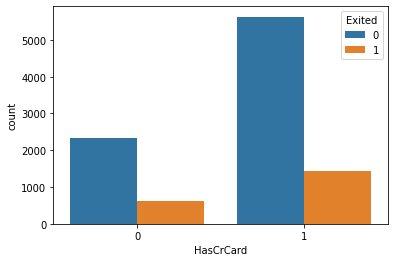

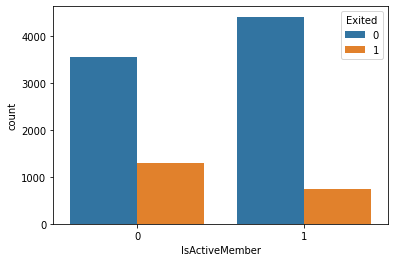

In [12]:
## Categorical Features vs Target Variable
sns.countplot(x='Geography',data=df,hue='Exited')
plt.show()
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()
sns.countplot(x='HasCrCard',data=df,hue='Exited')
plt.show()
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
plt.show()

In [13]:
# subset=subset.drop('Exited',axis=1)
# for i in subset.columns:  
#   sns.boxplot(df['Exited'],df[i],hue=df['Gender'])
#   plt.show()

#### Insights from Bivariate Plots
1.The Avg Credit Score seem to be almost the same for Active and Churned customers
2.Young People seem to stick to the bank compared to older people
3.The Average Bank Balance is high for Churned Customers
4.The churning rate is high with German Customers
5.The Churning rate is high among the Non-Active Members

### Distinguish the Target and Feature Set and divide the dataset into Training and Test sets

In [14]:
X=df.drop('Exited',axis=1)
y=df.pop('Exited')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8100
X_val size is 900
X_test size is 1000


In [16]:
## Standardising the train, Val and Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
num_subset=scaler.fit_transform(X_train[num_cols])
X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()
## Standardise the Validation data
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])
## Standardise the Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])

### Initialise and build the model

In [23]:
# import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

ModuleNotFoundError: No module named 'tensorflow.python.platform'

In [ ]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
# tf.convert_to_tensor(X_train_num_df,dtype=tf.float32)
# model.fit(X_train_num_df,y_train,epochs=100,batch_size=10,verbose=1)

### Predict the result using 0.5 threshold

In [ ]:
# tf.convert_to_tensor(X_val_num_df,dtype=tf.float32)
# y_pred_val=model.predict(X_val_num_df)
# y_pred_val[y_pred_val>0.5]=1
# y_pred_val[y_pred_val <0.5]=0

In [ ]:
# y_pred_val=y_pred_val.tolist()
# X_compare_val=X_val.copy()
# X_compare_val['y_actual']=y_val
# X_compare_val['y_pred']=y_pred_val
# X_compare_val.head(10)

### confusion matics of the validation set

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm_val=confusion_matrix(y_val,y_pred_val)
# cm_val

#### From the above confusion matrix, Out of 900 Validation dataset observations, our model accurately predicted 694+88=782 and made 96+22=118 incorrect predictions.

In [ ]:
Accuracy=782/900
print("Accuracy of the Model on the Validation Data set is 86.89%")

In [ ]:
loss1,accuracy1=model.evaluate(X_train_num_df,y_train,verbose=False)
loss2,accuracy2=model.evaluate(X_val_num_df,y_val,verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

#### Since our Training Accuracy and Validation Accuracy are pretty close, we can conclude that our model generalises well. So, lets apply the model on the Test set and make predictions and evaluate the model against the Test.

In [ ]:
from sklearn import metrics
y_pred_test=model.predict(X_test_num_df)
y_pred_test[y_pred_test>0.5]=1
y_pred_test[y_pred_test <0.5]=0
cm_test=metrics.confusion_matrix(y_test,y_pred_test)
cm_test
print("Test Confusion Matrix")

In [ ]:
cm_test

In [ ]:
loss3,accuracy3=model.evaluate(X_test_num_df,y_test,verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))